In [17]:
import os, glob
import pandas as pd

import xml.etree.ElementTree as ET


In [18]:
f_name = "ParlaMint-IT-en_2022-01-03-LEG18-Senato-sed-392.ana.xml"

In [19]:
with open(f_name, "rb") as f:
    tree = ET.parse(f)
    
root = tree.getroot()

In [20]:
NSMAP = {"tei": "http://www.tei-c.org/ns/1.0", 
          "xml": "http://www.w3.org/XML/1998/namespace"
}

sentences = root.findall(".//tei:body//tei:s", namespaces=NSMAP)

#you could do the same using the lxml library
#lxml has additional functionality, for instance the xpath method for more complex queries
#sentences = tree.xpath("//tei:body//tei:s", namespaces=NSMAP)

sentences[:5]

[<Element '{http://www.tei-c.org/ns/1.0}s' at 0x000001E3EE0F6480>,
 <Element '{http://www.tei-c.org/ns/1.0}s' at 0x000001E3EE0F69D0>,
 <Element '{http://www.tei-c.org/ns/1.0}s' at 0x000001E3EE0F6DE0>,
 <Element '{http://www.tei-c.org/ns/1.0}s' at 0x000001E3EE0F79C0>,
 <Element '{http://www.tei-c.org/ns/1.0}s' at 0x000001E3EE0F7D80>]

### Getting the text from the first sentence in the XML file

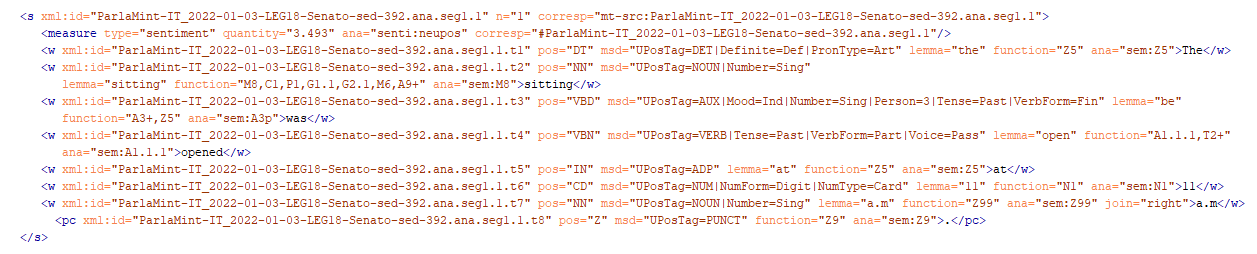

In [33]:
#with the method itertext() you can get the text of the sentences
#as you will see new line chracters \n are also included
#for more complex queries the use of the lxml library xpath method might be better suited
[t for t in sentences[0].itertext()]

['\n                     ',
 '\n',
 'The',
 '\n',
 'sitting',
 '\n',
 'was',
 '\n',
 'opened',
 '\n',
 'at',
 '\n',
 '11',
 '\n',
 'a.m',
 '\n',
 '.',
 '\n                  ']

In [41]:
#use the re library to apply a regular expression for filtering out the new line charcters
import re
[t for t in sentences[0].itertext() if not re.match("\n", t)]

['The', 'sitting', 'was', 'opened', 'at', '11', 'a.m', '.']

In [40]:
#we also want the sentence ID to reference sentences back
sentences[0].attrib["{http://www.w3.org/XML/1998/namespace}id"]

'ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.ana.seg1.1'

In [54]:
texts = []
ids = []

for s in sentences:
    s_texts = [t for t in s.itertext() if not re.match("\n", t)]
    #join the list s_texts to a sentence string before adding it to the list texts
    #as you will see later the joining with whitespace produces whitespace at place we might not want it, e.g. before punctuation, further processing might be necessary
    texts.append(" ".join(s_texts))
    ids.append(s.attrib["{http://www.w3.org/XML/1998/namespace}id"])  

### Read your texts and ids into a Pandas Dataframe

In [56]:
df = pd.DataFrame({"ID":ids, "Texts":texts})
df.head()

,ID,Texts
0,ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.a...,The sitting was opened at 11 a.m .
1,ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.a...,The Minutes shall be read .
2,ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.a...,"Mr PUGLIA , Secretary , gave a reading of the ..."
3,ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.a...,PRESIDENT . - The debate is
4,ParlaMint-IT_2022-01-03-LEG18-Senato-sed-392.a...,"Since there were no comments , the Minutes wer..."


In [2]:
folder_is = os.path.join(os.getcwd(), "ParlaMint-IS-en-ana-csv", "*.tsv")

folder_it = os.path.join(os.getcwd(), "ParlaMint-IT-en-ana-csv", "*.tsv")

error_f = "ParlaMint-IT-en-ana-csv/ParlaMint-IT-en_2022-02-16-LEG18-Senato-sed-404.ana_simplified2.tsv"

f_names = glob.glob(folder_is) + glob.glob(folder_it)

len(f_names)

153

In [3]:
#df_error = pd.read_csv(error_f, sep='\t', skiprows=1,names=["speech_id","sentence_id","speaker","topics","source","sentence_text"], encoding="utf-16")

In [4]:
#df_error.head()

In [5]:
from pandas.errors import ParserError
dataframes = []

for f_name in f_names:
    try:
        dataframes.append(pd.read_csv(f_name, sep='\t', skiprows=1,names=["speech_id","sentence_id","speaker","topics","source","sentence_text"], encoding="utf-16", quoting=csv.QUOTE_NONE))
    except ParserError as e:
        print(f_name)
        print(e)
        print("-"*100)
    
        

len(dataframes)

153

In [6]:
df = pd.concat(dataframes)

df.head()

,speech_id,sentence_id,speaker,topics,source,sentence_text
0,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg1.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,It has been given as follows:
1,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg2.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,President of the United States reports:
2,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg3.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,"I have decided, according to the proposal of t..."
3,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg4.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,"Arrange sites, January 11th, 2022."
4,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg5.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,The Guðni of Th. Jóhannesson.


In [7]:
df.shape

(183156, 6)

In [8]:
corpus_file = "parlamint-it-is-2022.tsv"

In [9]:
df.to_csv(corpus_file, encoding="utf-8" , sep='\t', index=False)

In [10]:
df = pd.read_csv(corpus_file, sep='\t')
df.head()

C:\Users\bleierr\AppData\Local\Temp\ipykernel_10976\2471294361.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(corpus_file, sep='\t')


,speech_id,sentence_id,speaker,topics,source,sentence_text
0,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg1.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,It has been given as follows:
1,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg2.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,President of the United States reports:
2,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg3.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,"I have decided, according to the proposal of t..."
3,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg4.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,"Arrange sites, January 11th, 2022."
4,ParlaMint-IS_2022-01-17-20.u1,ParlaMint-IS_2022-01-17-20.seg5.1,#KatrinJakobsdottir,#regular topic:other,http://www.althingi.is/altext/raeda/152/rad202...,The Guðni of Th. Jóhannesson.


In [11]:
df_txt = df[["sentence_id", "sentence_text"]].copy()

df_txt["char_count"] = df_txt["sentence_text"].str.len()

In [12]:
df_txt["char_count"].describe()

count    183156.000000
mean        135.774269
std         101.003150
min           1.000000
25%          62.000000
50%         115.000000
75%         185.000000
max        3027.000000
Name: char_count, dtype: float64

In [13]:
df_txt[df_txt["char_count"] < 50].shape

(36538, 3)

In [14]:
df_500 = df_txt[df_txt["char_count"] > 500]

In [15]:
#check if the sentence_id is unique
df_txt[df_txt["sentence_id"].duplicated(keep=False)]

,sentence_id,sentence_text,char_count


In [16]:
tuple_records = tuple(df_txt.to_records(index=False))
tuple_records

(('ParlaMint-IS_2022-01-17-20.seg1.1', 'It has been given as follows:', 29),
 ('ParlaMint-IS_2022-01-17-20.seg2.1', 'President of the United States reports:', 39),
 ('ParlaMint-IS_2022-01-17-20.seg3.1', 'I have decided, according to the proposal of the prime minister, that the Council should meet for an extended meeting on Monday, January 17, 2022 p.m. 3:00.', 156),
 ('ParlaMint-IS_2022-01-17-20.seg4.1', 'Arrange sites, January 11th, 2022.', 34),
 ('ParlaMint-IS_2022-01-17-20.seg5.1', 'The Guðni of Th. Jóhannesson.', 29),
 ('ParlaMint-IS_2022-01-17-20.seg6.1', "Katrín Jakobsdóttir's daughter.", 31),
 ('ParlaMint-IS_2022-01-17-20.seg7.1', 'Presidential Letters for a meeting of the General Assembly for a subsequent meeting on January 17, 2022', 103),
 ('ParlaMint-IS_2022-01-17-20.seg8.1', "I'd like to use this opportunity here after reading this letter and offer the highest. President and w. Senators welcome to New Year's Parliamentary Conferences.", 161),
 ('ParlaMint-IS_2022-01-17-20.s

In [17]:
# import sentence NLTK sentence tokenizer
#from nltk.tokenize import sent_tokenize

# tokenize text at sentence level
#sents = sent_tokenize(txt_row8)






NameError: name 'txt_row8' is not defined

In [ ]:
txt_row8 = df_txt.iloc[135274,1]
txt_row8

In [ ]:
# import sentence NLTK sentence tokenizer
from nltk.tokenize import sent_tokenize

# tokenize text at sentence level
sents = sent_tokenize(txt_row8)

sents

In [19]:
df_corpus = df[["sentence_id", "speech_id", "sentence_text"]].copy()
df_corpus.columns = ["ID", "Parent_ID", "Text"]
df_corpus["char_count"] = df_corpus["Text"].str.len()

In [29]:
#parlamint-it-is-2022.tsv
df_30 = df_corpus[df_corpus["char_count"] < 50]

In [30]:
df_30.head(50)

,ID,Parent_ID,Text,char_count
0,ParlaMint-IS_2022-01-17-20.seg1.1,ParlaMint-IS_2022-01-17-20.u1,It has been given as follows:,29
1,ParlaMint-IS_2022-01-17-20.seg2.1,ParlaMint-IS_2022-01-17-20.u1,President of the United States reports:,39
3,ParlaMint-IS_2022-01-17-20.seg4.1,ParlaMint-IS_2022-01-17-20.u1,"Arrange sites, January 11th, 2022.",34
4,ParlaMint-IS_2022-01-17-20.seg5.1,ParlaMint-IS_2022-01-17-20.u1,The Guðni of Th. Jóhannesson.,29
5,ParlaMint-IS_2022-01-17-20.seg6.1,ParlaMint-IS_2022-01-17-20.u1,Katrín Jakobsdóttir's daughter.,31
10,ParlaMint-IS_2022-01-17-20.seg10.2,ParlaMint-IS_2022-01-17-20.u3,Are such comments made?,23
13,ParlaMint-IS_2022-01-17-20.seg12.1,ParlaMint-IS_2022-01-17-20.u5,Mr. President.,14
27,ParlaMint-IS_2022-01-17-20.seg14.1,ParlaMint-IS_2022-01-17-20.u6,Mr. President.,14
28,ParlaMint-IS_2022-01-17-20.seg14.2,ParlaMint-IS_2022-01-17-20.u6,Thank you. A senator for the inquiry.,37
30,ParlaMint-IS_2022-01-17-20.seg14.4,ParlaMint-IS_2022-01-17-20.u6,I want to trade my answer in two.,33


In [ ]:
df_clean = df_30[df_30["char_count"] < 500]

In [ ]:
df_clean.describe()

df_clean.drop("char_count", axis=1, inplace=True)

df_clean.to_csv("parlamint-it-is-2022.txt", sep='\t', index=False)


In [ ]:
df1 = pd.read_csv("parlamint-it-is-2022.txt", sep='\t')
df1.describe()

In [ ]:
df1.head()